## Metis Project 2 - Predicting Market Values of Soccer Players in the Top 5 European Leagues Using Linear Regression

### 1. Data Cleaning 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('../Data/player_stats_values.csv')

In [3]:
df

,Player Name,League,Position,Age,Matches Played,Starts,90s Played,Goals,Assists,Yellow Cards,Red Cards,Total Shots,Shots on Target,Passes Completed,Passes Attempted,Key Passes,Completed Passes into PA,Players Dribbled Past,Dribbles into PA,Current Market Value (USD)
0,Kylian Mbappé,Ligue 1,FW,22.0,93.0,78.0,78.8,76.0,26.0,8.0,1.0,341.0,172.0,2125.0,2723.0,151.0,121.0,282.0,173.0,198000000.0
1,Neymar,Ligue 1,"MF,FW",28.0,60.0,58.0,57.9,50.0,29.0,14.0,4.0,230.0,99.0,2997.0,3866.0,175.0,248.0,375.0,87.0,140800000.0
2,Harry Kane,Premier League,FW,27.0,112.0,109.0,107.7,77.0,19.0,15.0,0.0,423.0,171.0,1626.0,2319.0,111.0,83.0,150.0,87.0,132000000.0
3,Sadio Mané,Premier League,FW,28.0,117.0,110.0,104.8,56.0,17.0,10.0,1.0,284.0,123.0,3029.0,3887.0,169.0,197.0,245.0,171.0,132000000.0
4,Mohamed Salah,Premier League,FW,28.0,125.0,120.0,116.4,86.0,31.0,3.0,0.0,456.0,202.0,2901.0,3828.0,211.0,215.0,281.0,179.0,132000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,Siriki Sanogo,Serie A,MF,15.0,2.0,0.0,0.4,0.0,0.0,0.0,0.0,2.0,0.0,12.0,16.0,0.0,0.0,2.0,0.0,110000.0
2168,Silvio Proto,Serie A,GK,35.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,65.0,0.0,0.0,0.0,0.0,110000.0
2169,Pedro López,La Liga,GK,22.0,5.0,4.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,113.0,143.0,0.0,0.0,0.0,0.0,110000.0
2170,Christian Pastina,Serie A,DF,19.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,12.0,16.0,1.0,1.0,0.0,0.0,83000.0


### 1.1. Convert market values to Million USD, and check for NaNs

In [4]:
df['Market Value (Mil USD)'] = df['Current Market Value (USD)']/1000000

In [5]:
df.drop('Current Market Value (USD)', axis=1, inplace=True)

In [6]:
df.head()

,Player Name,League,Position,Age,Matches Played,Starts,90s Played,Goals,Assists,Yellow Cards,Red Cards,Total Shots,Shots on Target,Passes Completed,Passes Attempted,Key Passes,Completed Passes into PA,Players Dribbled Past,Dribbles into PA,Market Value (Mil USD)
0,Kylian Mbappé,Ligue 1,FW,22.0,93.0,78.0,78.8,76.0,26.0,8.0,1.0,341.0,172.0,2125.0,2723.0,151.0,121.0,282.0,173.0,198.0
1,Neymar,Ligue 1,"MF,FW",28.0,60.0,58.0,57.9,50.0,29.0,14.0,4.0,230.0,99.0,2997.0,3866.0,175.0,248.0,375.0,87.0,140.8
2,Harry Kane,Premier League,FW,27.0,112.0,109.0,107.7,77.0,19.0,15.0,0.0,423.0,171.0,1626.0,2319.0,111.0,83.0,150.0,87.0,132.0
3,Sadio Mané,Premier League,FW,28.0,117.0,110.0,104.8,56.0,17.0,10.0,1.0,284.0,123.0,3029.0,3887.0,169.0,197.0,245.0,171.0,132.0
4,Mohamed Salah,Premier League,FW,28.0,125.0,120.0,116.4,86.0,31.0,3.0,0.0,456.0,202.0,2901.0,3828.0,211.0,215.0,281.0,179.0,132.0


In [7]:
df[df.isnull().any(axis=1)]

,Player Name,League,Position,Age,Matches Played,Starts,90s Played,Goals,Assists,Yellow Cards,Red Cards,Total Shots,Shots on Target,Passes Completed,Passes Attempted,Key Passes,Completed Passes into PA,Players Dribbled Past,Dribbles into PA,Market Value (Mil USD)


### 1.2. Drop players who have fewer than 10 matches played over three seasons - that's less than 10% of total matches played

In [8]:
df.drop(df[df['Matches Played']<10].index, inplace=True)

In [9]:
df

,Player Name,League,Position,Age,Matches Played,Starts,90s Played,Goals,Assists,Yellow Cards,Red Cards,Total Shots,Shots on Target,Passes Completed,Passes Attempted,Key Passes,Completed Passes into PA,Players Dribbled Past,Dribbles into PA,Market Value (Mil USD)
0,Kylian Mbappé,Ligue 1,FW,22.0,93.0,78.0,78.8,76.0,26.0,8.0,1.0,341.0,172.0,2125.0,2723.0,151.0,121.0,282.0,173.0,198.000
1,Neymar,Ligue 1,"MF,FW",28.0,60.0,58.0,57.9,50.0,29.0,14.0,4.0,230.0,99.0,2997.0,3866.0,175.0,248.0,375.0,87.0,140.800
2,Harry Kane,Premier League,FW,27.0,112.0,109.0,107.7,77.0,19.0,15.0,0.0,423.0,171.0,1626.0,2319.0,111.0,83.0,150.0,87.0,132.000
3,Sadio Mané,Premier League,FW,28.0,117.0,110.0,104.8,56.0,17.0,10.0,1.0,284.0,123.0,3029.0,3887.0,169.0,197.0,245.0,171.0,132.000
4,Mohamed Salah,Premier League,FW,28.0,125.0,120.0,116.4,86.0,31.0,3.0,0.0,456.0,202.0,2901.0,3828.0,211.0,215.0,281.0,179.0,132.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,Yohann Pelé,Ligue 1,GK,38.0,22.0,16.0,18.5,0.0,0.0,1.0,0.0,0.0,0.0,373.0,479.0,0.0,0.0,1.0,0.0,0.275
2147,Rafael,Serie A,GK,38.0,73.0,56.0,54.4,1.0,4.0,17.0,1.0,17.0,4.0,2189.0,2837.0,39.0,35.0,56.0,11.0,0.220
2156,Luisinho,La Liga,DF,35.0,41.0,37.0,36.6,1.0,1.0,16.0,0.0,20.0,5.0,1444.0,1874.0,21.0,28.0,38.0,5.0,0.220
2159,Gianluca Pegolo,Serie A,GK,39.0,11.0,9.0,9.5,0.0,0.0,1.0,0.0,0.0,0.0,212.0,290.0,0.0,0.0,0.0,0.0,0.165


### 1.3. Drop goalkeepers as they have completely different attributes/stats

In [10]:
df.drop(df[df['Position']=='GK'].index, inplace=True)

In [11]:
df.head()

,Player Name,League,Position,Age,Matches Played,Starts,90s Played,Goals,Assists,Yellow Cards,Red Cards,Total Shots,Shots on Target,Passes Completed,Passes Attempted,Key Passes,Completed Passes into PA,Players Dribbled Past,Dribbles into PA,Market Value (Mil USD)
0,Kylian Mbappé,Ligue 1,FW,22.0,93.0,78.0,78.8,76.0,26.0,8.0,1.0,341.0,172.0,2125.0,2723.0,151.0,121.0,282.0,173.0,198.0
1,Neymar,Ligue 1,"MF,FW",28.0,60.0,58.0,57.9,50.0,29.0,14.0,4.0,230.0,99.0,2997.0,3866.0,175.0,248.0,375.0,87.0,140.8
2,Harry Kane,Premier League,FW,27.0,112.0,109.0,107.7,77.0,19.0,15.0,0.0,423.0,171.0,1626.0,2319.0,111.0,83.0,150.0,87.0,132.0
3,Sadio Mané,Premier League,FW,28.0,117.0,110.0,104.8,56.0,17.0,10.0,1.0,284.0,123.0,3029.0,3887.0,169.0,197.0,245.0,171.0,132.0
4,Mohamed Salah,Premier League,FW,28.0,125.0,120.0,116.4,86.0,31.0,3.0,0.0,456.0,202.0,2901.0,3828.0,211.0,215.0,281.0,179.0,132.0


In [12]:
df.describe()

,Age,Matches Played,Starts,90s Played,Goals,Assists,Yellow Cards,Red Cards,Total Shots,Shots on Target,Passes Completed,Passes Attempted,Key Passes,Completed Passes into PA,Players Dribbled Past,Dribbles into PA,Market Value (Mil USD)
count,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000,1742.000000
mean,26.508611,61.935706,48.730195,48.411366,7.135476,4.922503,9.396096,0.480482,62.966131,21.390930,1818.229621,2271.311137,45.828932,40.828358,55.524684,19.770379,13.661110
std,4.073800,33.001391,31.462232,30.508791,11.329893,6.028772,7.535049,0.851676,69.274699,27.436489,1496.786762,1768.371823,48.297488,45.166535,57.212777,29.718864,18.587395
min,17.000000,10.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.220000
25%,23.000000,34.000000,21.000000,21.500000,1.000000,1.000000,4.000000,0.000000,16.000000,4.000000,649.000000,827.000000,11.000000,10.000000,15.000000,2.000000,2.750000
50%,26.000000,61.000000,45.000000,45.400000,3.000000,3.000000,8.000000,0.000000,40.000000,12.000000,1411.500000,1837.000000,28.000000,25.000000,38.000000,9.000000,6.600000
75%,29.000000,89.000000,73.000000,71.475000,8.000000,7.000000,13.000000,1.000000,84.000000,27.000000,2630.250000,3303.500000,65.000000,57.000000,75.000000,25.000000,16.500000
max,39.000000,177.000000,171.000000,166.400000,106.000000,53.000000,51.000000,5.000000,611.000000,285.000000,9907.000000,11677.000000,342.000000,473.000000,616.000000,249.000000,198.000000


### 1.4. Standardize a player's position to his primary position if they have multiple

In [13]:
df['Position'].value_counts()

DF       639
MF       380
FW       256
FW,MF    189
MF,FW    153
DF,MF     45
MF,DF     45
FW,DF     18
DF,FW     17
Name: Position, dtype: int64

In [14]:
df.loc[306,'Position'] = 'MF'
df.loc[484,'Position'] = 'FW'
df.loc[893,'Position'] = 'MF'
df.loc[1225,'Position'] = 'MF'
df.loc[1538,'Position'] = 'MF'
df.loc[468,'Position'] = 'MF'

In [15]:
df['Position'] = df['Position'].apply(lambda x:x.split(',')[0] if len(x)>2 else x)

In [16]:
df['Position'].value_counts()

DF    698
MF    580
FW    464
Name: Position, dtype: int64

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.iloc[174]

Player Name                 Dan-Axel Zagadou
League                            Bundesliga
Position                                  DF
Age                                       21
Matches Played                            49
Starts                                    33
90s Played                              34.2
Goals                                      4
Assists                                    1
Yellow Cards                               5
Red Cards                                  1
Total Shots                               25
Shots on Target                            9
Passes Completed                        2222
Passes Attempted                        2532
Key Passes                                10
Completed Passes into PA                   6
Players Dribbled Past                     24
Dribbles into PA                           1
Market Value (Mil USD)                 34.65
Name: 174, dtype: object

### 2. Feature Engineering - add standardized and implied numerical stats 

In [19]:
df_standardized = df.copy()

In [20]:
df_standardized['% of Matches Started'] = (df_standardized['Starts'] / df_standardized['Matches Played'])
df_standardized['Goals/90'] = (df_standardized['Goals'] / df_standardized['90s Played'])
df_standardized['Assists/90'] = (df_standardized['Assists'] / df_standardized['90s Played'])
df_standardized['Shots on Target %'] = (df_standardized['Shots on Target'] / df_standardized['Total Shots'])
df_standardized['Goals/SoT %'] = (df_standardized['Goals'] / df_standardized['Shots on Target'])
df_standardized['Pass Comp Rate %'] = (df_standardized['Passes Completed'] / df_standardized['Passes Attempted'])
df_standardized['Comp Passes into PA / Comp Passes %'] = (df_standardized['Completed Passes into PA'] / df_standardized['Passes Completed'])
df_standardized['Key Passes/90'] = (df_standardized['Key Passes'] / df_standardized['90s Played'])
df_standardized['Players Dribbled Past/90'] = (df_standardized['Players Dribbled Past'] / df_standardized['90s Played'])
df_standardized['Dribbles into PA/90'] = (df_standardized['Dribbles into PA'] / df_standardized['90s Played'])

# Assume one red card is worth/as bad as two yellow cards
df_standardized['Cards Received/90'] = (df_standardized['Yellow Cards'] + (2*df_standardized['Red Cards'])) / df_standardized['90s Played']

df_standardized.drop(['Matches Played','Starts','90s Played','Goals','Assists',
                      'Yellow Cards','Red Cards','Total Shots','Shots on Target',
                      'Passes Completed','Passes Attempted','Key Passes',
                      'Completed Passes into PA','Players Dribbled Past','Dribbles into PA'], axis=1, inplace=True)

In [21]:
df_standardized.columns

Index(['Player Name', 'League', 'Position', 'Age', 'Market Value (Mil USD)',
       '% of Matches Started', 'Goals/90', 'Assists/90', 'Shots on Target %',
       'Goals/SoT %', 'Pass Comp Rate %',
       'Comp Passes into PA / Comp Passes %', 'Key Passes/90',
       'Players Dribbled Past/90', 'Dribbles into PA/90', 'Cards Received/90'],
      dtype='object')

In [22]:
df_standardized = pd.DataFrame(df_standardized, columns=['Player Name', 'League', 'Position', 'Age',
       '% of Matches Started', 'Goals/90', 'Assists/90', 'Shots on Target %', 'Goals/SoT %', 'Pass Comp Rate %',
       'Comp Passes into PA / Comp Passes %', 'Key Passes/90', 'Players Dribbled Past/90', 'Dribbles into PA/90', 
       'Cards Received/90', 'Market Value (Mil USD)'])

In [23]:
df_standardized[df_standardized['Player Name']=='Youri Tielemans']
#df_standardized.tail(10)

,Player Name,League,Position,Age,% of Matches Started,Goals/90,Assists/90,Shots on Target %,Goals/SoT %,Pass Comp Rate %,Comp Passes into PA / Comp Passes %,Key Passes/90,Players Dribbled Past/90,Dribbles into PA/90,Cards Received/90,Market Value (Mil USD)
63,Youri Tielemans,Premier League,MF,23.0,0.87069,0.153061,0.142857,0.313253,0.288462,0.7996,0.02117,1.204082,1.132653,0.22449,0.142857,55.0


In [24]:
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Player Name                          1742 non-null   object 
 1   League                               1742 non-null   object 
 2   Position                             1742 non-null   object 
 3   Age                                  1742 non-null   float64
 4   % of Matches Started                 1742 non-null   float64
 5   Goals/90                             1742 non-null   float64
 6   Assists/90                           1742 non-null   float64
 7   Shots on Target %                    1737 non-null   float64
 8   Goals/SoT %                          1657 non-null   float64
 9   Pass Comp Rate %                     1742 non-null   float64
 10  Comp Passes into PA / Comp Passes %  1742 non-null   float64
 11  Key Passes/90                 

In [25]:
df_standardized.fillna(0, inplace=True)

In [26]:
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Player Name                          1742 non-null   object 
 1   League                               1742 non-null   object 
 2   Position                             1742 non-null   object 
 3   Age                                  1742 non-null   float64
 4   % of Matches Started                 1742 non-null   float64
 5   Goals/90                             1742 non-null   float64
 6   Assists/90                           1742 non-null   float64
 7   Shots on Target %                    1742 non-null   float64
 8   Goals/SoT %                          1742 non-null   float64
 9   Pass Comp Rate %                     1742 non-null   float64
 10  Comp Passes into PA / Comp Passes %  1742 non-null   float64
 11  Key Passes/90                 

### 2.1 Create a dataframe of just forwards and midfielders 

In [27]:
df_standardized_ForMid = df_standardized.drop(df[df['Position']=='DF'].index).reset_index(drop=True)

In [28]:
df_standardized_ForMid

,Player Name,League,Position,Age,% of Matches Started,Goals/90,Assists/90,Shots on Target %,Goals/SoT %,Pass Comp Rate %,Comp Passes into PA / Comp Passes %,Key Passes/90,Players Dribbled Past/90,Dribbles into PA/90,Cards Received/90,Market Value (Mil USD)
0,Kylian Mbappé,Ligue 1,FW,22.0,0.838710,0.964467,0.329949,0.504399,0.441860,0.780389,0.056941,1.916244,3.578680,2.195431,0.126904,198.000
1,Neymar,Ligue 1,MF,28.0,0.966667,0.863558,0.500864,0.430435,0.505051,0.775220,0.082749,3.022453,6.476684,1.502591,0.379965,140.800
2,Harry Kane,Premier League,FW,27.0,0.973214,0.714949,0.176416,0.404255,0.450292,0.701164,0.051046,1.030641,1.392758,0.807799,0.139276,132.000
3,Sadio Mané,Premier League,FW,28.0,0.940171,0.534351,0.162214,0.433099,0.455285,0.779264,0.065038,1.612595,2.337786,1.631679,0.114504,132.000
4,Mohamed Salah,Premier League,FW,28.0,0.960000,0.738832,0.266323,0.442982,0.425743,0.757837,0.074112,1.812715,2.414089,1.537801,0.025773,132.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Augusto Fernández,La Liga,MF,34.0,0.230769,0.000000,0.000000,0.000000,0.000000,0.798611,0.026087,0.526316,0.000000,0.000000,0.526316,0.330
1040,Antonio Di Gaudio,Serie A,FW,28.0,0.750000,0.000000,0.128205,0.142857,0.000000,0.571429,0.029412,0.512821,1.282051,0.897436,0.000000,0.330
1041,Mikel Rico,La Liga,MF,36.0,0.852941,0.037594,0.000000,0.214286,0.166667,0.792564,0.013580,0.601504,1.090226,0.037594,0.075188,0.330
1042,Damián Musto,La Liga,MF,31.0,0.833333,0.000000,0.000000,0.125000,0.000000,0.807198,0.006369,0.320856,0.106952,0.000000,0.588235,0.330


### 3. Data Visualization

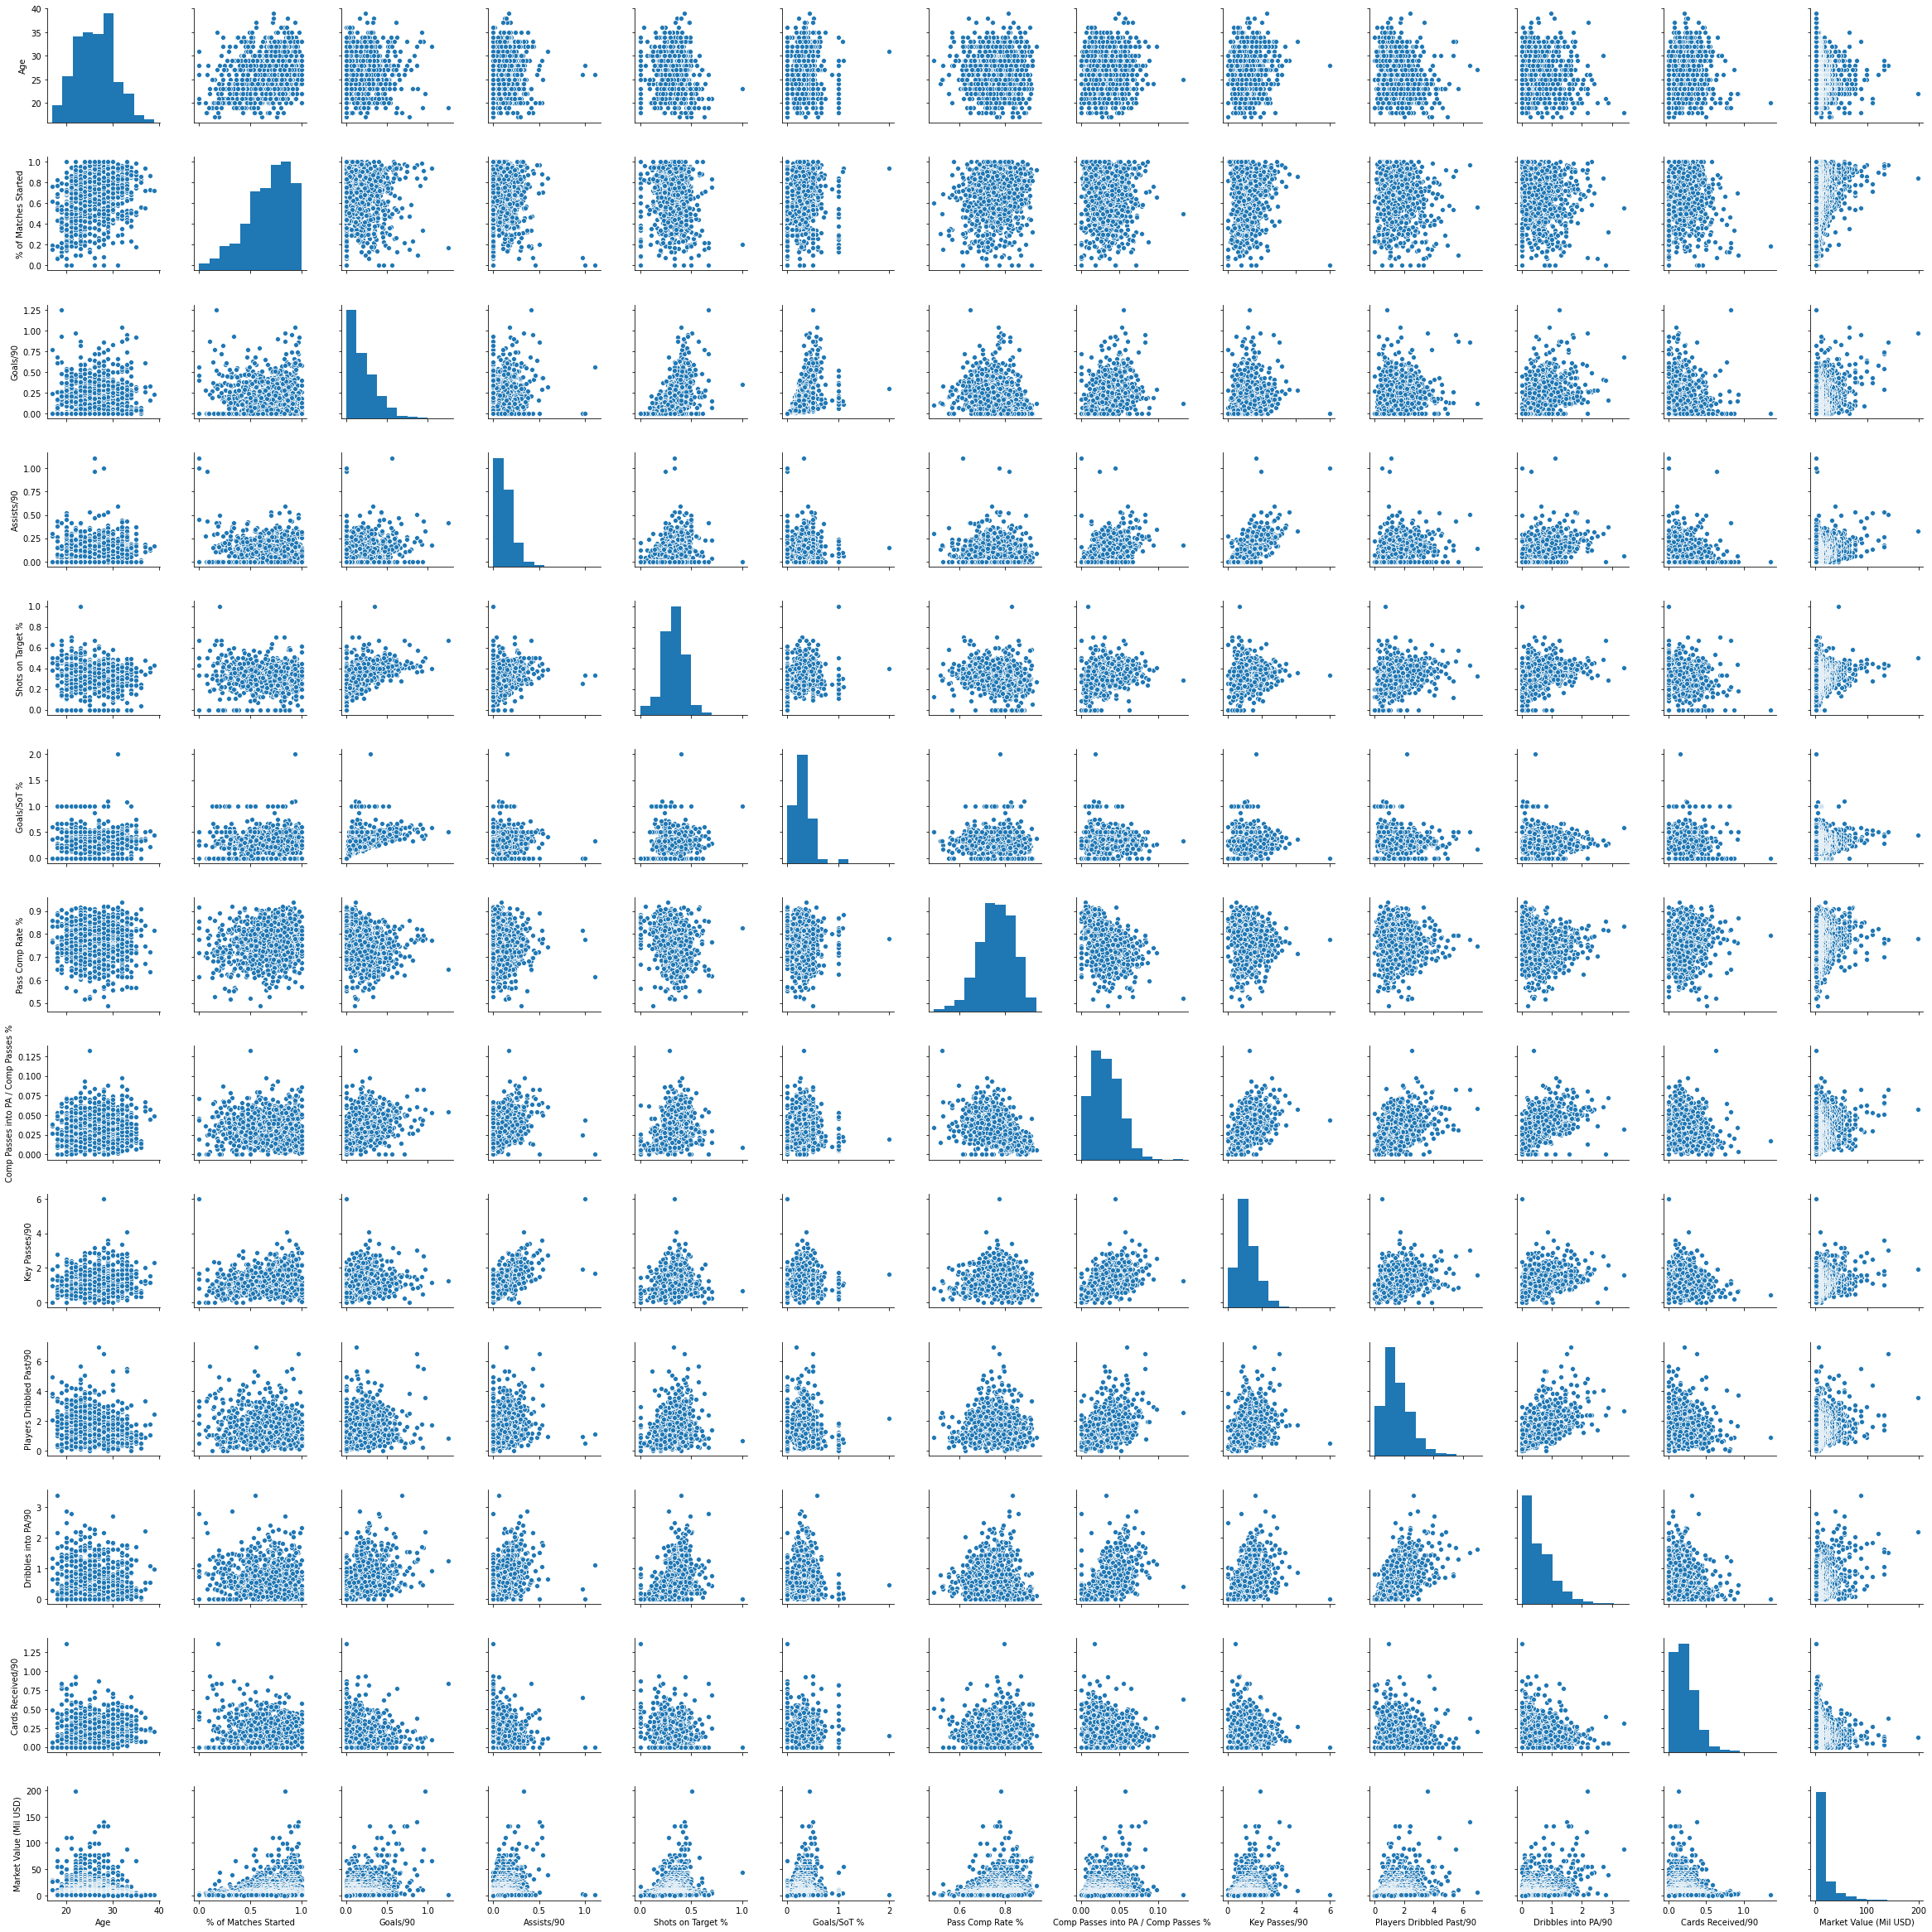

In [29]:
sns.pairplot(df_standardized_ForMid)
plt.tight_layout()
plt.savefig('../Charts/Pairplot.png', dpi=600)

In [30]:
df_standardized_ForMid.corr()

,Age,% of Matches Started,Goals/90,Assists/90,Shots on Target %,Goals/SoT %,Pass Comp Rate %,Comp Passes into PA / Comp Passes %,Key Passes/90,Players Dribbled Past/90,Dribbles into PA/90,Cards Received/90,Market Value (Mil USD)
Age,1.000000,0.309303,0.073357,0.074284,-0.034251,0.099889,-0.038467,0.049919,0.110157,-0.244613,-0.146675,0.034569,-0.156819
% of Matches Started,0.309303,1.000000,-0.040309,-0.014149,-0.069164,0.062117,0.191312,-0.055481,0.063580,-0.161570,-0.162899,-0.041158,0.296227
Goals/90,0.073357,-0.040309,1.000000,0.278515,0.547435,0.553874,-0.309453,0.401036,0.182354,0.152274,0.454972,-0.233420,0.365676
Assists/90,0.074284,-0.014149,0.278515,1.000000,0.246543,0.068821,-0.143068,0.450920,0.674807,0.270527,0.386114,-0.175841,0.286003
Shots on Target %,-0.034251,-0.069164,0.547435,0.246543,1.000000,0.254645,-0.237957,0.353010,0.207087,0.228481,0.403044,-0.270845,0.196826
Goals/SoT %,0.099889,0.062117,0.553874,0.068821,0.254645,1.000000,-0.129391,0.154357,0.051943,-0.023378,0.112295,-0.105072,0.154680
Pass Comp Rate %,-0.038467,0.191312,-0.309453,-0.143068,-0.237957,-0.129391,1.000000,-0.496699,-0.066231,-0.066372,-0.238235,0.114184,0.179754
Comp Passes into PA / Comp Passes %,0.049919,-0.055481,0.401036,0.450920,0.353010,0.154357,-0.496699,1.000000,0.526753,0.453478,0.598325,-0.212469,0.202351
Key Passes/90,0.110157,0.063580,0.182354,0.674807,0.207087,0.051943,-0.066231,0.526753,1.000000,0.352509,0.396658,-0.180727,0.271633
Players Dribbled Past/90,-0.244613,-0.161570,0.152274,0.270527,0.228481,-0.023378,-0.066372,0.453478,0.352509,1.000000,0.605855,-0.143926,0.232810


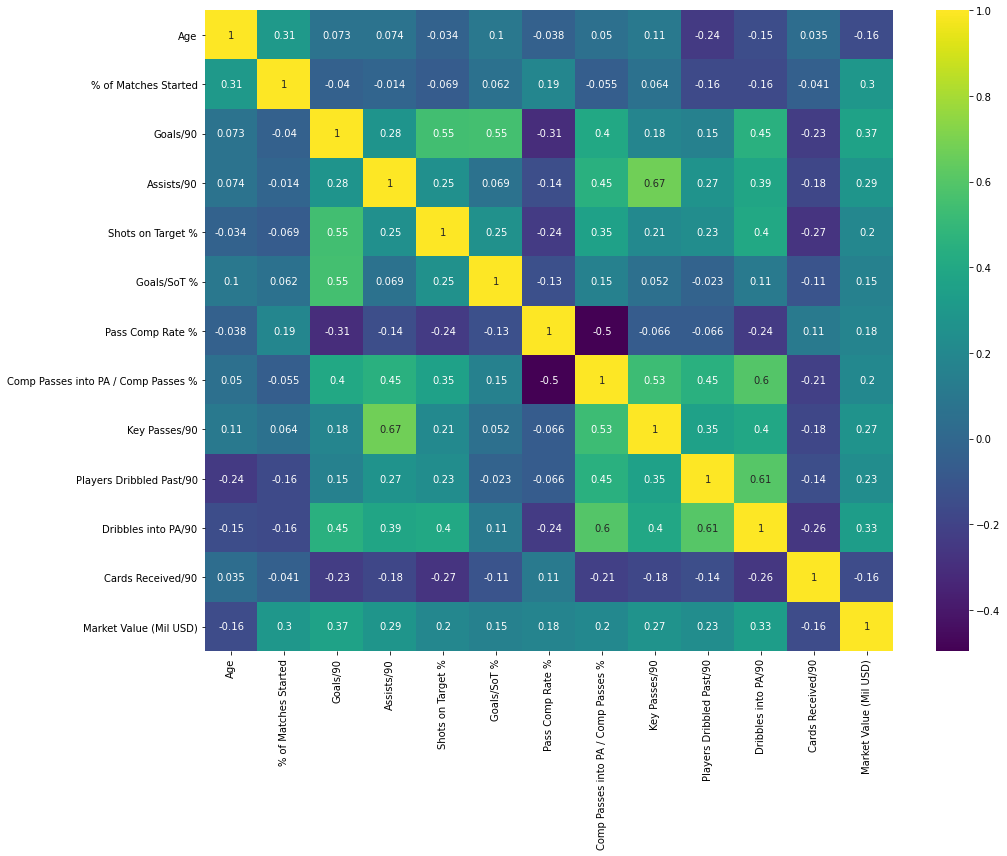

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(df_standardized_ForMid.corr(), cmap='viridis', annot=True)
plt.tight_layout()
plt.savefig('../Charts/heatmap.png', dpi=600)

# Watch out for multicollinearity - may want to drop some
# Highly correlated features:
# 1. Assists/90, Key Passes/90: 0.65
# 2. Goals/90, Goals/SoT %: 0.62
# 3. Players Dribbled Past/90, Dribbles into PA/90: 0.61
# 4. Comp Passes into PA/Comp Passes %, Dribbles into PA/90: 0.60
# 5. Goals/90, Shots on Target %: 0.56
# 6. Comp Passes into PA/Comp Passes %, Key Passes/90: 0.51
# 7. Comp Passes into PA/Comp Passes %, Pass Comp Rate %: -0.50
# 8. Comp Passes into PA/Comp Passes %, Players Dribbled Past/90: 0.49

# No. of Correlations higher than 0.35:
# 1. Comp Passes into PA/Comp Passes %: 7
# 2. Dribbles into PA/90: 6
# 3. Key Passes/90: 4
# 4. Goals/90: 4
# 5. Players Dribbled Past/90: 3 
# 6. Shots on Target %: 3
# 7. Assists/90: 3

In [32]:
df_standardized_ForMid.corr()['Market Value (Mil USD)'].sort_values(ascending=False)

Market Value (Mil USD)                 1.000000
Goals/90                               0.365676
Dribbles into PA/90                    0.331789
% of Matches Started                   0.296227
Assists/90                             0.286003
Key Passes/90                          0.271633
Players Dribbled Past/90               0.232810
Comp Passes into PA / Comp Passes %    0.202351
Shots on Target %                      0.196826
Pass Comp Rate %                       0.179754
Goals/SoT %                            0.154680
Cards Received/90                     -0.155616
Age                                   -0.156819
Name: Market Value (Mil USD), dtype: float64

### 4. Modeling

#### 4.1. Baseline Model1 - Use all numerical features  
#### 4.2. Cross-Validation - Simple linear, Polynomial, Ridge, Lasso - scaled vs. unscaled
#### 4.3. Model Tuning - Dropping features, Log transformation 

### 4.1. Baseline Model1 - Use all numerical features

In [33]:
X = df_standardized_ForMid.drop(['Player Name','League','Position','Market Value (Mil USD)'], axis=1)
y = df_standardized_ForMid['Market Value (Mil USD)']

In [34]:
X

,Age,% of Matches Started,Goals/90,Assists/90,Shots on Target %,Goals/SoT %,Pass Comp Rate %,Comp Passes into PA / Comp Passes %,Key Passes/90,Players Dribbled Past/90,Dribbles into PA/90,Cards Received/90
0,22.0,0.838710,0.964467,0.329949,0.504399,0.441860,0.780389,0.056941,1.916244,3.578680,2.195431,0.126904
1,28.0,0.966667,0.863558,0.500864,0.430435,0.505051,0.775220,0.082749,3.022453,6.476684,1.502591,0.379965
2,27.0,0.973214,0.714949,0.176416,0.404255,0.450292,0.701164,0.051046,1.030641,1.392758,0.807799,0.139276
3,28.0,0.940171,0.534351,0.162214,0.433099,0.455285,0.779264,0.065038,1.612595,2.337786,1.631679,0.114504
4,28.0,0.960000,0.738832,0.266323,0.442982,0.425743,0.757837,0.074112,1.812715,2.414089,1.537801,0.025773
...,...,...,...,...,...,...,...,...,...,...,...,...
1039,34.0,0.230769,0.000000,0.000000,0.000000,0.000000,0.798611,0.026087,0.526316,0.000000,0.000000,0.526316
1040,28.0,0.750000,0.000000,0.128205,0.142857,0.000000,0.571429,0.029412,0.512821,1.282051,0.897436,0.000000
1041,36.0,0.852941,0.037594,0.000000,0.214286,0.166667,0.792564,0.013580,0.601504,1.090226,0.037594,0.075188
1042,31.0,0.833333,0.000000,0.000000,0.125000,0.000000,0.807198,0.006369,0.320856,0.106952,0.000000,0.588235


In [35]:
y

0       198.000
1       140.800
2       132.000
3       132.000
4       132.000
         ...   
1039      0.330
1040      0.330
1041      0.330
1042      0.330
1043      0.275
Name: Market Value (Mil USD), Length: 1044, dtype: float64

### 4.2. Cross-Validation - Simple linear, Polynomial, Ridge, Lasso 

In [36]:
def cross_val(X, y):
    '''
    input: X(dataframe) of features, y(series) of target
    output: Mean cross validation for simple linear, ridge, and lasso models
    '''
    X, X_test, y, y_test = train_test_split(
        X, y, test_size=.2,
        random_state=10)  #hold out 20% of the data for final testing

    #this helps with the way kf will generate indices below
    X_np, y_np = np.array(X), np.array(y)

    #run the CV
    kf = KFold(n_splits=5, shuffle=True, random_state=71)
#     cv_lm_r2s, cv_lm_reg_ridge_r2s, cv_lm_reg_lasso_r2s, cv_lm_poly_r2s = [], [], [], []  # collect the validation results for the models (R^2)
    cv_lm_r2s_adj, cv_lm_reg_ridge_r2s_adj, cv_lm_reg_lasso_r2s_adj, cv_lm_poly_r2s_adj  = [], [], [], [] # collect the validation results for the models (adjusted R^2) 
    cv_lm_RMSE, cv_lm_reg_ridge_RMSE, cv_lm_reg_lasso_RMSE, cv_lm_poly_RMSE = [], [], [], []
    
    for train_ind, val_ind in kf.split(X_np, y_np):
        X_train, y_train = X_np[train_ind], y_np[train_ind]
        X_val, y_val = X_np[val_ind], y_np[val_ind]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
       
        # SIMPLE LINEAR REGRESSION
        lm = LinearRegression()
        
        ## fitting unscaled features
#         lm.fit(X_train, y_train)
#         cv_lm_r2s.append(lm.score(X_val, y_val))
#         cv_lm_r2s_adj.append(1 - (1-lm.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
#         cv_lm_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm.predict(X_val))))
        
        ## fitting scaled features
        lm.fit(X_train_scaled, y_train)
#         cv_lm_r2s.append(lm.score(X_val_scaled, y_val))
        cv_lm_r2s_adj.append(1 - (1-lm.score(X_val_scaled, y_val))*(len(y_val)-1)/(len(y_val)-X_val_scaled.shape[1]-1))
        cv_lm_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm.predict(X_val_scaled))))
    
        
        # RIDGE REGRESSION
        lm_reg_ridge = RidgeCV()

        ## fitting unscaled features
#         lm_reg_ridge.fit(X_train, y_train)
#         cv_lm_reg_ridge_r2s_.append(lm_reg_ridge.score(X_val, y_val))
#         cv_lm_reg_ridge_r2s_adj.append(1 - (1-lm_reg_ridge.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
#         cv_lm_reg_ridge_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm_reg_ridge.predict(X_val))))

        ## fitting scaled features
        lm_reg_ridge.fit(X_train_scaled, y_train)
#         cv_lm_reg_ridge_r2s.append(lm_reg_ridge.score(X_val_scaled, y_val))
        cv_lm_reg_ridge_r2s_adj.append(1 - (1-lm_reg_ridge.score(X_val_scaled, y_val))*(len(y_val)-1)/(len(y_val)-X_val_scaled.shape[1]-1))
        cv_lm_reg_ridge_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm_reg_ridge.predict(X_val_scaled))))
            
        # LASSO REGRESSION
        lm_reg_lasso = LassoCV()
        
        ## fitting unscaled features
#         lm_reg_lasso.fit(X_train, y_train)
#         cv_lm_reg_lasso_r2s.append(lm_reg_lasso.score(X_val, y_val))  
#         cv_lm_reg_lasso_r2s_adj.append(1 - (1-lm_reg_lasso.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1))
#         cv_lm_reg_lasso_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm_reg_lasso.predict(X_val))))

        ## fitting scaled features
        lm_reg_lasso.fit(X_train_scaled, y_train)
#         cv_lm_reg_lasso_r2s.append(lm_reg_lasso.score(X_val_scaled, y_val))
        cv_lm_reg_lasso_r2s_adj.append(1 - (1-lm_reg_lasso.score(X_val_scaled, y_val))*(len(y_val)-1)/(len(y_val)-X_val_scaled.shape[1]-1))
        cv_lm_reg_lasso_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm_reg_lasso.predict(X_val_scaled))))
    
        # POLYNOMIAL REGRESSION
        poly = PolynomialFeatures(degree=2)
        
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        
        ## fitting unscaled features
        lm_poly = LinearRegression()
        
        lm_poly.fit(X_train_poly, y_train)
#         cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
        cv_lm_poly_r2s_adj.append(1 - (1-lm_poly.score(X_val_poly, y_val))*(len(y_val)-1)/(len(y_val)-X_val_poly.shape[1]-1))
        cv_lm_poly_RMSE.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred=lm_poly.predict(X_val_poly))))
        
        
#     print('Simple linear regression scores: ', cv_lm_r2s)
#     print('Simple linear regression scores (adjusted): ', cv_lm_r2s_adj)
#     print('Ridge scores: ', cv_lm_reg_ridge_r2s, '\n')
#     print('Ridge scores (adjusted): ', cv_lm_reg_ridge_r2s_adj)
#     print('Lasso scores: ', cv_lm_reg_lasso_r2s, '\n')
#     print('Lasso scores (adjusted): ', cv_lm_reg_lasso_r2s_adj)
#     print('Polynomical regression scores: ',cv_lm_poly_r2s)
#     print('Polynomical regression scores (adjusted): ',cv_lm_poly_r2s_adj, '\n')

#     print(f'Simple linear mean cv r^2: {np.mean(cv_lm_r2s):.4f} +- {np.std(cv_lm_r2s):.4f}')
    print(f'Simple linear mean cv adjusted r^2: {np.mean(cv_lm_r2s_adj):.4f} +- {np.std(cv_lm_r2s_adj):.4f}')                            
#     print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_ridge_r2s):.4f} +- {np.std(cv_lm_reg_ridge_r2s):.4f}')
    print(f'Ridge mean cv adjusted r^2: {np.mean(cv_lm_reg_ridge_r2s_adj):.4f} +- {np.std(cv_lm_reg_ridge_r2s_adj):.4f}')
#     print(f'Lasso mean cv r^2: {np.mean(cv_lm_reg_lasso_r2s):.4f} +- {np.std(cv_lm_reg_lasso_r2s):.4f}')
    print(f'Lasso mean cv adjusted r^2: {np.mean(cv_lm_reg_lasso_r2s_adj):.4f} +- {np.std(cv_lm_reg_lasso_r2s_adj):.4f}')
#     print(f'Polynomial mean cv r^2: {np.mean(cv_lm_poly_r2s):.4f} +- {np.std(cv_lm_poly_r2s):.4f}')  
    print(f'Polynomial mean cv adjusted r^2: {np.mean(cv_lm_poly_r2s_adj):.4f} +- {np.std(cv_lm_poly_r2s_adj):.4f}', '\n') 
 
    print(f'Simple linear mean cv RMSE: {np.mean(cv_lm_RMSE):.4f} +- {np.std(cv_lm_RMSE):.4f}')                                                     
    print(f'Ridge mean cv RMSE: {np.mean(cv_lm_reg_ridge_RMSE):.4f} +- {np.std(cv_lm_reg_ridge_RMSE):.4f}')                            
    print(f'Lasso mean cv RMSE: {np.mean(cv_lm_reg_lasso_RMSE):.4f} +- {np.std(cv_lm_reg_lasso_RMSE):.4f}') 
    print(f'Polynomial mean cv RMSE: {np.mean(cv_lm_poly_RMSE):.4f} +- {np.std(cv_lm_poly_RMSE):.4f}', '\n')  
    
    print(f'Ridge alpha: {lm_reg_ridge.alpha_}')
    print(f'Lasso alpha: {lm_reg_lasso.alpha_}')
    
    Lasso_coef = pd.DataFrame(lm_reg_lasso.coef_, index=X.columns, columns=['Lasso Coef'])
    return Lasso_coef

In [37]:
cross_val(X, y)

Simple linear mean cv adjusted r^2: 0.3582 +- 0.0709
Ridge mean cv adjusted r^2: 0.3611 +- 0.0631
Lasso mean cv adjusted r^2: 0.3521 +- 0.0640
Polynomial mean cv adjusted r^2: -0.3052 +- 0.1966 

Simple linear mean cv RMSE: 15.8806 +- 2.1789
Ridge mean cv RMSE: 15.8608 +- 2.2293
Lasso mean cv RMSE: 15.9631 +- 2.1765
Polynomial mean cv RMSE: 15.7803 +- 2.3129 

Ridge alpha: 10.0
Lasso alpha: 0.1333387208165046


,Lasso Coef
Age,-5.683074
% of Matches Started,6.603432
Goals/90,7.855095
Assists/90,3.211000
Shots on Target %,-0.729308
Goals/SoT %,-0.872194
Pass Comp Rate %,5.892785
Comp Passes into PA / Comp Passes %,1.156538
Key Passes/90,0.302529
Players Dribbled Past/90,0.352479


### 4.3. Model Tuning 

In [38]:
# Dropping features that had coefficients of 0 from the LASSO model

In [39]:
X2 = X.drop(['Shots on Target %', 'Goals/SoT %', 'Cards Received/90'], axis=1)
y2 = df_standardized_ForMid['Market Value (Mil USD)']

In [40]:
cross_val(X2,y2)

Simple linear mean cv adjusted r^2: 0.3738 +- 0.0527
Ridge mean cv adjusted r^2: 0.3758 +- 0.0479
Lasso mean cv adjusted r^2: 0.3736 +- 0.0467
Polynomial mean cv adjusted r^2: 0.2069 +- 0.1412 

Simple linear mean cv RMSE: 15.8719 +- 2.2726
Ridge mean cv RMSE: 15.8565 +- 2.3119
Lasso mean cv RMSE: 15.8859 +- 2.3145
Polynomial mean cv RMSE: 14.8941 +- 1.9350 

Ridge alpha: 10.0
Lasso alpha: 0.14297473975632344


,Lasso Coef
Age,-5.634839
% of Matches Started,6.501232
Goals/90,6.987805
Assists/90,3.226277
Pass Comp Rate %,5.822363
Comp Passes into PA / Comp Passes %,1.056280
Key Passes/90,0.256782
Players Dribbled Past/90,0.322856
Dribbles into PA/90,1.743874


In [41]:
# Again, drop coefficents that are 0 or close to 0 

In [42]:
X3 = X2.drop(['Key Passes/90','Players Dribbled Past/90','Comp Passes into PA / Comp Passes %'], axis=1)
y3 = df_standardized_ForMid['Market Value (Mil USD)']

In [43]:
cross_val(X3,y3)

Simple linear mean cv adjusted r^2: 0.3894 +- 0.0414
Ridge mean cv adjusted r^2: 0.3908 +- 0.0372
Lasso mean cv adjusted r^2: 0.3895 +- 0.0411
Polynomial mean cv adjusted r^2: 0.4720 +- 0.0923 

Simple linear mean cv RMSE: 15.8402 +- 2.3266
Ridge mean cv RMSE: 15.8317 +- 2.3651
Lasso mean cv RMSE: 15.8392 +- 2.3294
Polynomial mean cv RMSE: 13.5421 +- 1.5933 

Ridge alpha: 10.0
Lasso alpha: 0.007115886488714729


,Lasso Coef
Age,-5.827907
% of Matches Started,6.728047
Goals/90,7.113183
Assists/90,3.737397
Pass Comp Rate %,5.612592
Dribbles into PA/90,2.473510


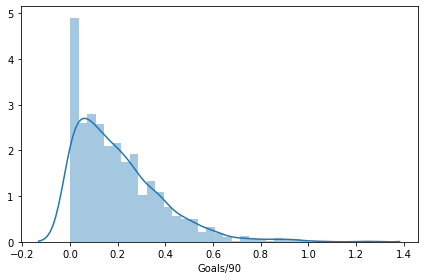

In [44]:
sns.distplot(df_standardized_ForMid['Goals/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/Goals_90_Dist.png', dpi=600)

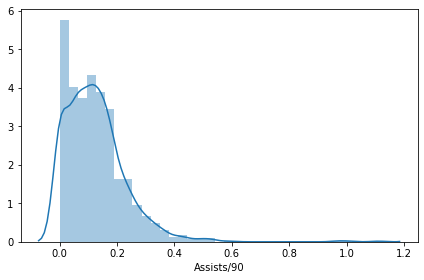

In [45]:
sns.distplot(df_standardized_ForMid['Assists/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/Assists_90_Dist.png', dpi=600)

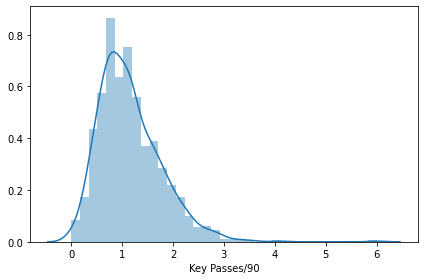

In [46]:
sns.distplot(df_standardized_ForMid['Key Passes/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/Keypasses_90_Dist.png', dpi=600)

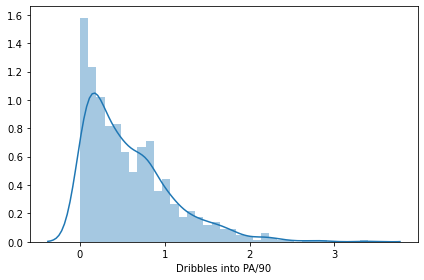

In [47]:
sns.distplot(df_standardized_ForMid['Dribbles into PA/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/DribblesintoPA_90_Dist.png', dpi=600)

In [48]:
# Log transformation - find right-skewed features:
# 1. Goals/90
# 2. Assists/90
# 3. Dribbles into PA/90
# 4. Market Value (Mil USD)

# Notice the columns that we already removed are also right-skewed - we can keep these columns, log transform, 
# then run the cross-validation again.

# Goals/SoT %
# Comp Passes into PA / Comp Passes %
# Cards Received/90
# Players Dribbled Past/90
# Key Passes/90

In [49]:
def logtransform(columnlist):
    '''
    input: list of features
    output: new columns with log of feature
    '''
    for elem in columnlist:
        df_standardized_ForMid[f'log{elem}'] = df_standardized_ForMid[elem].apply(np.log1p)  #log(x+1) due to zeros in features

    return df_standardized_ForMid

In [50]:
columns = [
    'Goals/90', 'Assists/90', 'Goals/SoT %', 'Comp Passes into PA / Comp Passes %',
    'Key Passes/90', 'Players Dribbled Past/90', 'Dribbles into PA/90',
    'Cards Received/90' 
]
df_standardized_ForMid_log = logtransform(columns).drop(columns, axis=1)

In [51]:
df_standardized_ForMid_log

,Player Name,League,Position,Age,% of Matches Started,Shots on Target %,Pass Comp Rate %,Market Value (Mil USD),logGoals/90,logAssists/90,logGoals/SoT %,logComp Passes into PA / Comp Passes %,logKey Passes/90,logPlayers Dribbled Past/90,logDribbles into PA/90,logCards Received/90
0,Kylian Mbappé,Ligue 1,FW,22.0,0.838710,0.504399,0.780389,198.000,0.675221,0.285141,0.365934,0.055379,1.070296,1.521411,1.161722,0.119474
1,Neymar,Ligue 1,MF,28.0,0.966667,0.430435,0.775220,140.800,0.622487,0.406041,0.408826,0.079504,1.391892,2.011789,0.917326,0.322058
2,Harry Kane,Premier League,FW,27.0,0.973214,0.404255,0.701164,132.000,0.539383,0.162473,0.371765,0.049785,0.708351,0.872447,0.592110,0.130393
3,Sadio Mané,Premier League,FW,28.0,0.940171,0.433099,0.779264,132.000,0.428108,0.150327,0.375201,0.063010,0.960344,1.205308,0.967622,0.108409
4,Mohamed Salah,Premier League,FW,28.0,0.960000,0.442982,0.757837,132.000,0.553213,0.236117,0.354693,0.071495,1.034150,1.227911,0.931298,0.025447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,Augusto Fernández,La Liga,MF,34.0,0.230769,0.000000,0.798611,0.330,0.000000,0.000000,0.000000,0.025752,0.422857,0.000000,0.000000,0.422857
1040,Antonio Di Gaudio,Serie A,FW,28.0,0.750000,0.142857,0.571429,0.330,0.000000,0.120628,0.000000,0.028988,0.413976,0.825075,0.640503,0.000000
1041,Mikel Rico,La Liga,MF,36.0,0.852941,0.214286,0.792564,0.330,0.036905,0.000000,0.154151,0.013489,0.470943,0.737272,0.036905,0.072496
1042,Damián Musto,La Liga,MF,31.0,0.833333,0.125000,0.807198,0.330,0.000000,0.000000,0.000000,0.006349,0.278280,0.101610,0.000000,0.462624


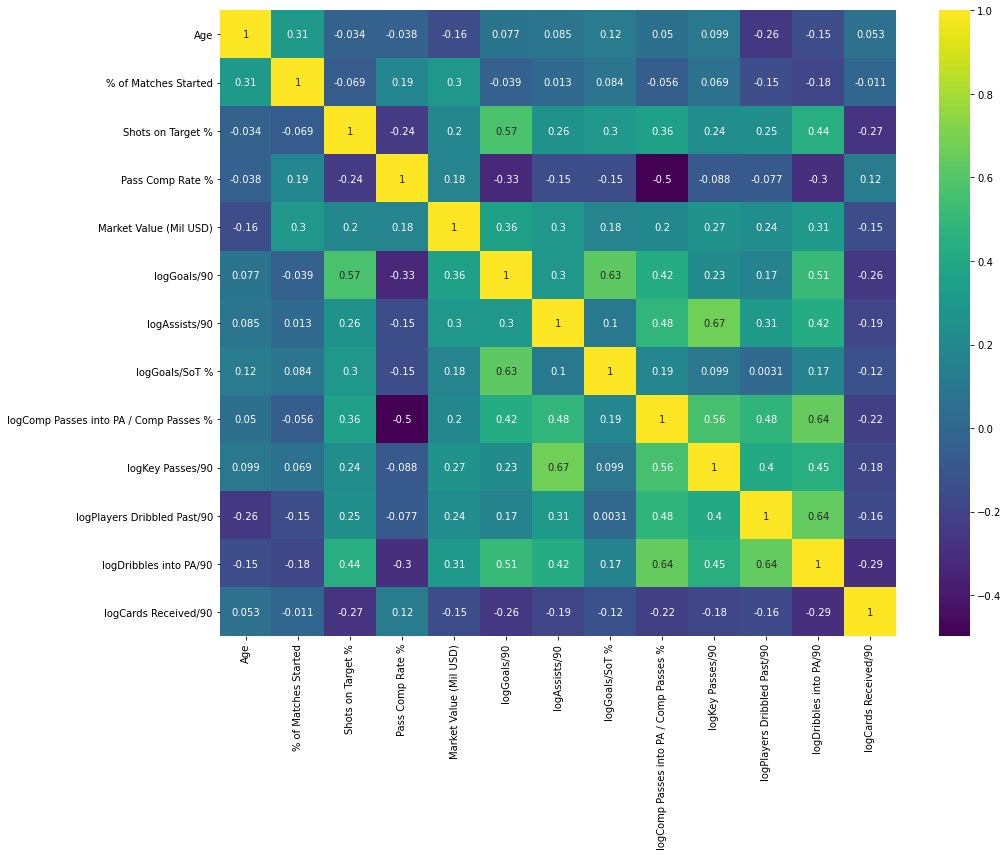

In [52]:
plt.figure(figsize=(15,12))
sns.heatmap(df_standardized_ForMid_log.corr(), cmap='viridis', annot=True)
plt.tight_layout()
plt.savefig('../Charts/heatmap_log.png', dpi=600)

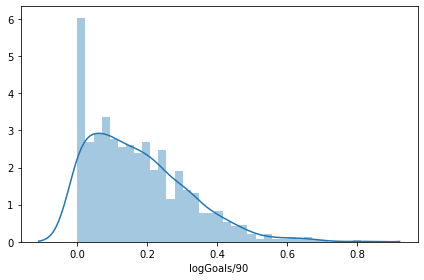

In [53]:
sns.distplot(df_standardized_ForMid_log['logGoals/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/Goals_90_log_Dist.png', dpi=600)

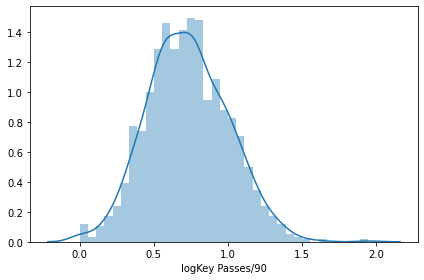

In [54]:
sns.distplot(df_standardized_ForMid_log['logKey Passes/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/Keypasses_90_log_Dist.png', dpi=600)

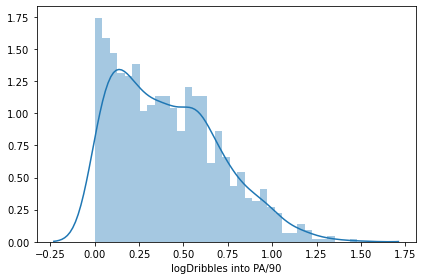

In [55]:
sns.distplot(df_standardized_ForMid_log['logDribbles into PA/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/DribblesintoPA_90_log_Dist.png', dpi=600)

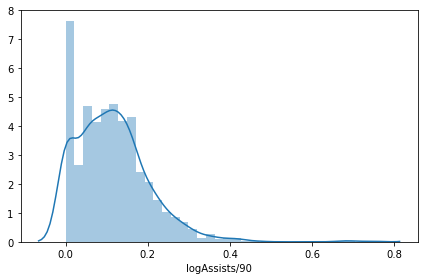

In [56]:
sns.distplot(df_standardized_ForMid_log['logAssists/90'], bins=35)
plt.tight_layout()
plt.savefig('../Charts/Assists_90_log_Dist.png', dpi=600)

In [57]:
# Run cross validation scores and RMSE to find the best model

In [58]:
X_log = df_standardized_ForMid_log.drop(['Player Name','League','Position','Market Value (Mil USD)'], axis=1)
y = df_standardized_ForMid_log['Market Value (Mil USD)']

In [59]:
cross_val(X_log,y)

Simple linear mean cv adjusted r^2: 0.3569 +- 0.0660
Ridge mean cv adjusted r^2: 0.3595 +- 0.0581
Lasso mean cv adjusted r^2: 0.3563 +- 0.0511
Polynomial mean cv adjusted r^2: -0.1596 +- 0.1475 

Simple linear mean cv RMSE: 15.9231 +- 2.3316
Ridge mean cv RMSE: 15.9064 +- 2.3799
Lasso mean cv RMSE: 15.9524 +- 2.3689
Polynomial mean cv RMSE: 14.8505 +- 1.7845 

Ridge alpha: 10.0
Lasso alpha: 0.14721864237909915


,Lasso Coef
Age,-5.667391
% of Matches Started,6.428617
Shots on Target %,-0.845866
Pass Comp Rate %,6.127878
logGoals/90,8.163331
logAssists/90,3.563032
logGoals/SoT %,-1.182232
logComp Passes into PA / Comp Passes %,1.231495
logKey Passes/90,0.000000
logPlayers Dribbled Past/90,0.583909


In [60]:
# Running LASSO for the log tranformed features produces the same features with zero (or close to zero) coefficients as before.

In [61]:
X2_log = X_log.drop(['Shots on Target %', 'logGoals/SoT %', 'logKey Passes/90', 'logCards Received/90'], axis=1)
y2 = df_standardized_ForMid_log['Market Value (Mil USD)']

In [62]:
cross_val(X2_log, y2)

Simple linear mean cv adjusted r^2: 0.3754 +- 0.0483
Ridge mean cv adjusted r^2: 0.3771 +- 0.0439
Lasso mean cv adjusted r^2: 0.3762 +- 0.0462
Polynomial mean cv adjusted r^2: 0.3515 +- 0.1207 

Simple linear mean cv RMSE: 15.9266 +- 2.4265
Ridge mean cv RMSE: 15.9148 +- 2.4629
Lasso mean cv RMSE: 15.9186 +- 2.4252
Polynomial mean cv RMSE: 14.0047 +- 1.3194 

Ridge alpha: 10.0
Lasso alpha: 0.006833284065664595


,Lasso Coef
Age,-5.839827
% of Matches Started,6.453884
Pass Comp Rate %,6.280842
logGoals/90,7.075171
logAssists/90,3.632866
logComp Passes into PA / Comp Passes %,1.326868
logPlayers Dribbled Past/90,0.519573
logDribbles into PA/90,1.080005


In [63]:
# Dropping 'Players Dribbled Past/90', 'Cards Received/90' and keeping 'Comp Passes into PA / Comp Passes %' produces the highest adjusted R^2

In [64]:
X3_log = X2_log.drop(['logPlayers Dribbled Past/90'], axis=1)
y3 = df_standardized_ForMid_log['Market Value (Mil USD)']

In [65]:
cross_val(X3_log,y3)

Simple linear mean cv adjusted r^2: 0.3804 +- 0.0485
Ridge mean cv adjusted r^2: 0.3820 +- 0.0441
Lasso mean cv adjusted r^2: 0.3803 +- 0.0479
Polynomial mean cv adjusted r^2: 0.4136 +- 0.0899 

Simple linear mean cv RMSE: 15.9111 +- 2.4147
Ridge mean cv RMSE: 15.9010 +- 2.4507
Lasso mean cv RMSE: 15.9128 +- 2.4161
Polynomial mean cv RMSE: 13.8548 +- 1.4633 

Ridge alpha: 10.0
Lasso alpha: 0.006833284065664595


,Lasso Coef
Age,-5.913327
% of Matches Started,6.438212
Pass Comp Rate %,6.355000
logGoals/90,6.996190
logAssists/90,3.645669
logComp Passes into PA / Comp Passes %,1.454128
logDribbles into PA/90,1.375573


### 5. Model Testing

In [66]:
# Select the best feature-target: (X3_log, y3)

In [67]:
X3_log_train, X3_log_test, y3_train, y3_test = train_test_split(X3_log, y3, test_size=0.2, random_state=10)

In [68]:
# Fitting X3_log, y3 to simple linear regression
simple_lm = LinearRegression()

simple_lm.fit(X3_log_train, y3_train)
print(f'Simple Linear Regression Test adjusted R^2: {1 - (1-simple_lm.score(X3_log_test, y3_test))*(len(y3_test)-1)/(len(y3_test)-X3_log_test.shape[1]-1)}')

Simple Linear Regression Test adjusted R^2: 0.4151506555055917


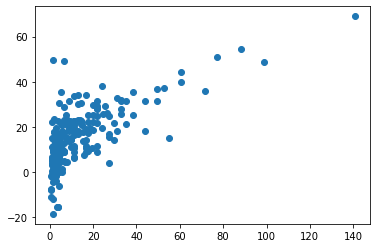

In [69]:
simple_lm_pred = simple_lm.predict(X3_log_test)

plt.scatter(y3_test, simple_lm_pred)

In [70]:
mean_squared_error(y3_test, simple_lm_pred)

181.7798657797681

In [71]:
np.sqrt(mean_squared_error(y3_test, simple_lm_pred))

13.482576377672336

In [72]:
mean_absolute_error(y3_test, simple_lm_pred)

9.646600221134715

### 6. Include League as a Categorical Feature and One-hot Encode 

In [73]:
league_df = pd.get_dummies(df_standardized_ForMid_log['League'], drop_first=True)

In [74]:
df_standardized_ForMid_log = pd.concat([df_standardized_ForMid_log,league_df], axis=1)

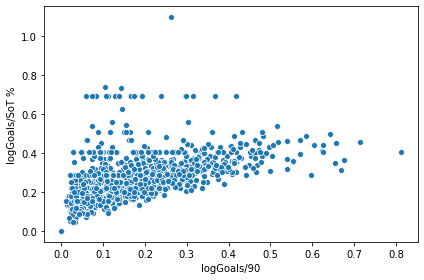

In [75]:
sns.scatterplot(x='logGoals/90', y='logGoals/SoT %', data=df_standardized_ForMid_log)
plt.tight_layout()
plt.savefig('../Charts/Goals90_GoalsSoT_scatter.png', dpi=600)

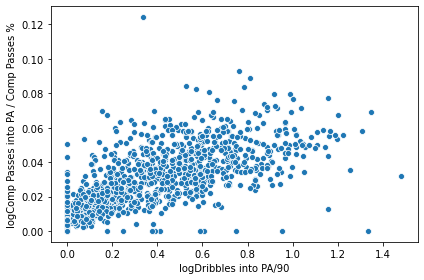

In [76]:
sns.scatterplot(x='logDribbles into PA/90', y='logComp Passes into PA / Comp Passes %', data=df_standardized_ForMid_log)
plt.tight_layout()
plt.savefig('../Charts/Dribbles_CompPassPA_scatter.png', dpi=600)

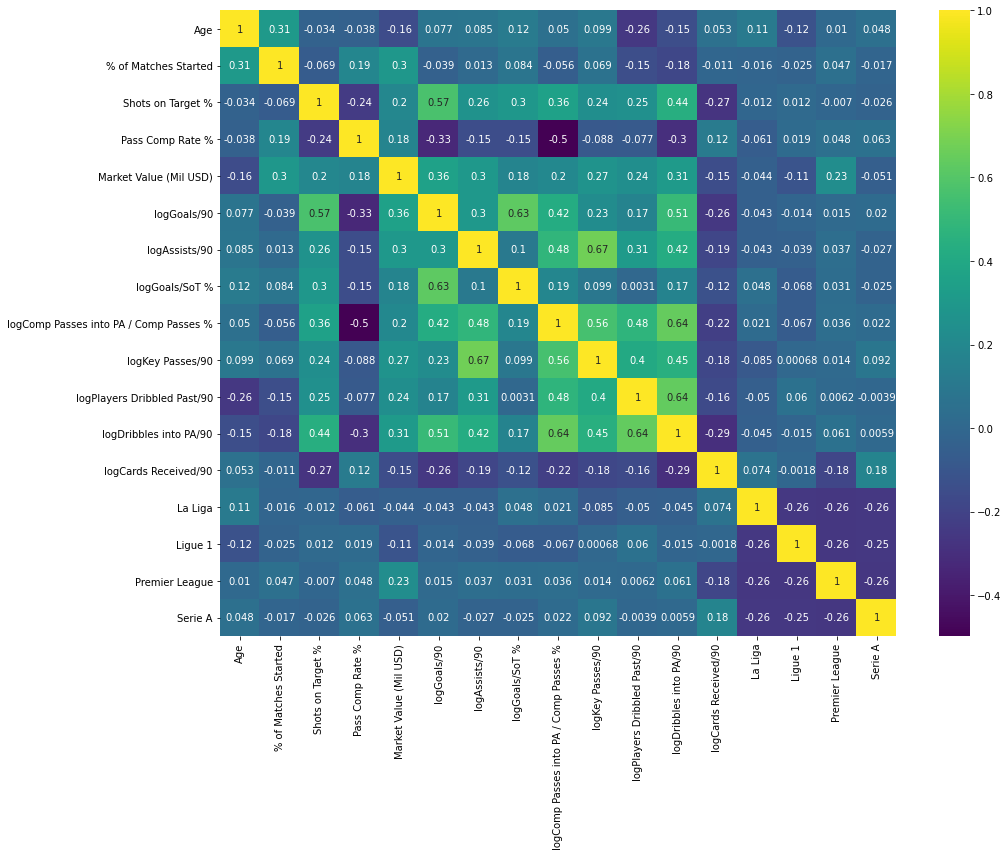

In [77]:
plt.figure(figsize=(15,12))
sns.heatmap(df_standardized_ForMid_log.corr(), cmap='viridis', annot=True)
plt.tight_layout()
plt.savefig('../Charts/heatmap_log_cat.png', dpi=600)

In [78]:
X_log_league = pd.concat([X_log,league_df], axis=1)
y_league = df_standardized_ForMid_log['Market Value (Mil USD)']

In [79]:
cross_val(X_log_league, y_league)

Simple linear mean cv adjusted r^2: 0.3945 +- 0.0702
Ridge mean cv adjusted r^2: 0.3971 +- 0.0624
Lasso mean cv adjusted r^2: 0.3941 +- 0.0657
Polynomial mean cv adjusted r^2: -5.4549 +- 1.1653 

Simple linear mean cv RMSE: 15.2241 +- 2.1334
Ridge mean cv RMSE: 15.2091 +- 2.1797
Lasso mean cv RMSE: 15.2370 +- 2.1439
Polynomial mean cv RMSE: 14.5092 +- 1.5697 

Ridge alpha: 10.0
Lasso alpha: 0.04192839739980972


,Lasso Coef
Age,-6.227517
% of Matches Started,6.854429
Shots on Target %,-1.070826
Pass Comp Rate %,6.043203
logGoals/90,9.342347
logAssists/90,3.316613
logGoals/SoT %,-2.072716
logComp Passes into PA / Comp Passes %,0.843946
logKey Passes/90,0.748018
logPlayers Dribbled Past/90,1.033081


In [80]:
X2_log_league = X_log_league.drop(['Shots on Target %', 'logCards Received/90', 'Serie A'], axis=1)
y2_league = df_standardized_ForMid_log['Market Value (Mil USD)']

In [81]:
cross_val(X2_log_league, y2_league)

Simple linear mean cv adjusted r^2: 0.4034 +- 0.0695
Ridge mean cv adjusted r^2: 0.4056 +- 0.0624
Lasso mean cv adjusted r^2: 0.4031 +- 0.0642
Polynomial mean cv adjusted r^2: -0.2506 +- 0.2734 

Simple linear mean cv RMSE: 15.2588 +- 2.1138
Ridge mean cv RMSE: 15.2465 +- 2.1587
Lasso mean cv RMSE: 15.2732 +- 2.1367
Polynomial mean cv RMSE: 13.7672 +- 1.2139 

Ridge alpha: 10.0
Lasso alpha: 0.06372743589842578


,Lasso Coef
Age,-6.120697
% of Matches Started,6.760289
Pass Comp Rate %,5.987829
logGoals/90,8.647903
logAssists/90,3.261599
logGoals/SoT %,-2.004947
logComp Passes into PA / Comp Passes %,0.807934
logKey Passes/90,0.585637
logPlayers Dribbled Past/90,1.004284
logDribbles into PA/90,0.259143


In [82]:
X3_log_league = X2_log_league.drop(['logKey Passes/90','logComp Passes into PA / Comp Passes %','Ligue 1', 'logPlayers Dribbled Past/90', 'logGoals/SoT %'], axis=1)
y3_league = df_standardized_ForMid_log['Market Value (Mil USD)']

In [83]:
cross_val(X3_log_league, y3_league)

Simple linear mean cv adjusted r^2: 0.4151 +- 0.0516
Ridge mean cv adjusted r^2: 0.4166 +- 0.0474
Lasso mean cv adjusted r^2: 0.4152 +- 0.0512
Polynomial mean cv adjusted r^2: 0.4078 +- 0.0983 

Simple linear mean cv RMSE: 15.3824 +- 2.1780
Ridge mean cv RMSE: 15.3732 +- 2.2191
Lasso mean cv RMSE: 15.3815 +- 2.1814
Polynomial mean cv RMSE: 13.4232 +- 1.4261 

Ridge alpha: 10.0
Lasso alpha: 0.006833284065664595


,Lasso Coef
Age,-6.139444
% of Matches Started,6.620291
Pass Comp Rate %,5.759422
logGoals/90,7.108467
logAssists/90,4.037156
logDribbles into PA/90,1.791138
La Liga,2.001466
Premier League,3.866391


In [84]:
# Including League as one-hot encoded variables signficantly improves the predictive power of all the models 
# But we need to perform assumption testing for linear regression by looking at the distribution of residuals

### 7 Assumption Testing - Residual Distribution

In [85]:
lr = LinearRegression()
fit = lr.fit(X3_log_league, y3_league)

df_standardized_ForMid_log['Predictions'] = fit.predict(X3_log_league)
df_standardized_ForMid_log['Residuals'] = abs(y3_league - df_standardized_ForMid_log['Predictions'])

df_standardized_ForMid_log.sort_values('Residuals', ascending=False).head(10)

,Player Name,League,Position,Age,% of Matches Started,Shots on Target %,Pass Comp Rate %,Market Value (Mil USD),logGoals/90,logAssists/90,...,logKey Passes/90,logPlayers Dribbled Past/90,logDribbles into PA/90,logCards Received/90,La Liga,Ligue 1,Premier League,Serie A,Predictions,Residuals
0,Kylian Mbappé,Ligue 1,FW,22.0,0.838710,0.504399,0.780389,198.0,0.675221,0.285141,...,1.070296,1.521411,1.161722,0.119474,0,1,0,0,66.812390,131.187610
5,Kevin De Bruyne,Premier League,MF,29.0,0.878505,0.333333,0.763402,132.0,0.251559,0.423994,...,1.525482,0.991090,0.720814,0.084349,0,0,1,0,46.399579,85.600421
2,Harry Kane,Premier League,FW,27.0,0.973214,0.404255,0.701164,132.0,0.539383,0.162473,...,0.708351,0.872447,0.592110,0.130393,0,0,1,0,50.100929,81.899071
3,Sadio Mané,Premier League,FW,28.0,0.940171,0.433099,0.779264,132.0,0.428108,0.150327,...,0.960344,1.205308,0.967622,0.108409,0,0,1,0,51.080788,80.919212
1,Neymar,Ligue 1,MF,28.0,0.966667,0.430435,0.775220,140.8,0.622487,0.406041,...,1.391892,2.011789,0.917326,0.322058,0,1,0,0,61.879736,78.920264
4,Mohamed Salah,Premier League,FW,28.0,0.960000,0.442982,0.757837,132.0,0.553213,0.236117,...,1.034150,1.227911,0.931298,0.025447,0,0,1,0,59.992967,72.007033
7,João Félix,La Liga,FW,21.0,0.714286,0.275862,0.798107,110.0,0.317835,0.127561,...,0.736415,0.954988,0.538997,0.240676,1,0,0,0,38.487375,71.512625
10,Romelu Lukaku,Serie A,FW,27.0,0.857143,0.482143,0.689984,99.0,0.479108,0.110712,...,0.823319,0.738447,0.700438,0.119408,0,0,0,1,30.410674,68.589326
12,Joshua Kimmich,Bundesliga,MF,25.0,0.952830,0.416667,0.850801,93.5,0.086676,0.309081,...,1.216172,0.706141,0.271455,0.140549,0,0,0,0,32.866680,60.633320
6,Raheem Sterling,Premier League,FW,26.0,0.896552,0.416667,0.821612,121.0,0.458308,0.209092,...,0.988070,1.213232,1.144692,0.152488,0,0,1,0,61.810704,59.189296


In [86]:
# Remove outliers

In [87]:
df_standardized_ForMid_log = df_standardized_ForMid_log[df_standardized_ForMid_log['Residuals']<13].reset_index(drop=True)
df_standardized_ForMid_log = df_standardized_ForMid_log[(df_standardized_ForMid_log['League']=='Premier League') |
                                                        (df_standardized_ForMid_log['League']=='La Liga') |
                                                        (df_standardized_ForMid_log['Market Value (Mil USD)']>15)].reset_index(drop=True)
df_standardized_ForMid_log = df_standardized_ForMid_log[df_standardized_ForMid_log['Predictions']>10].reset_index(drop=True)
df_standardized_ForMid_log

,Player Name,League,Position,Age,% of Matches Started,Shots on Target %,Pass Comp Rate %,Market Value (Mil USD),logGoals/90,logAssists/90,...,logKey Passes/90,logPlayers Dribbled Past/90,logDribbles into PA/90,logCards Received/90,La Liga,Ligue 1,Premier League,Serie A,Predictions,Residuals
0,Anthony Martial,Premier League,FW,25.0,0.766990,0.453608,0.784069,60.50,0.407227,0.191975,...,0.876350,1.206351,0.985777,0.076373,0,0,1,0,50.909241,9.590759
1,Jack Grealish,Premier League,FW,25.0,1.000000,0.306306,0.788056,55.00,0.227456,0.227456,...,1.357899,1.222850,1.199444,0.211683,0,0,1,0,53.460012,1.539988
2,Mason Greenwood,Premier League,FW,19.0,0.456522,0.453125,0.845361,55.00,0.390866,0.042560,...,0.671168,0.975380,0.834798,0.042560,0,0,1,0,45.113207,9.886793
3,Eden Hazard,La Liga,FW,30.0,0.838710,0.486188,0.817878,55.00,0.339548,0.259665,...,1.299773,1.620695,1.307094,0.052505,1,0,0,0,45.686679,9.313321
4,Ousmane Dembélé,La Liga,FW,23.0,0.666667,0.437500,0.785262,55.00,0.300754,0.262942,...,1.240152,1.715851,1.133098,0.140089,1,0,0,0,43.978337,11.021663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Andrés Guardado,La Liga,MF,34.0,0.863158,0.242857,0.844885,1.98,0.025382,0.176305,...,0.848766,0.593199,0.176305,0.268869,1,0,0,0,11.063505,9.083505
318,Luca Sangalli,La Liga,MF,24.0,0.586207,0.555556,0.727903,1.65,0.063716,0.233615,...,0.781254,0.947381,0.180126,0.000000,1,0,0,0,11.848925,10.198925
319,Nolito,La Liga,MF,34.0,0.643836,0.490909,0.722124,1.65,0.248418,0.141364,...,0.982184,0.974027,0.833569,0.231353,1,0,0,0,10.906451,9.256451
320,Joaquín,La Liga,FW,39.0,0.723214,0.431579,0.814180,1.65,0.209092,0.155257,...,1.189921,1.232251,0.684062,0.187905,1,0,0,0,10.409025,8.759025


In [88]:
# Rerun cross-validation and find the best model

In [89]:
X_log_league = df_standardized_ForMid_log.drop(['Player Name','League','Position','Market Value (Mil USD)','Predictions', 'Residuals'], axis=1)
y_league = df_standardized_ForMid_log['Market Value (Mil USD)']

In [90]:
cross_val(X_log_league, y_league)

Simple linear mean cv adjusted r^2: 0.5412 +- 0.0620
Ridge mean cv adjusted r^2: 0.5425 +- 0.0607
Lasso mean cv adjusted r^2: 0.5486 +- 0.0546
Polynomial mean cv adjusted r^2: 1.8156 +- 0.3852 

Simple linear mean cv RMSE: 6.6329 +- 0.2638
Ridge mean cv RMSE: 6.6249 +- 0.2575
Lasso mean cv RMSE: 6.5841 +- 0.2571
Polynomial mean cv RMSE: 14.8363 +- 3.4063 

Ridge alpha: 1.0
Lasso alpha: 0.09966864386212194


,Lasso Coef
Age,-6.177332
% of Matches Started,5.116243
Shots on Target %,-0.908326
Pass Comp Rate %,6.343173
logGoals/90,8.118421
logAssists/90,1.683567
logGoals/SoT %,0.000000
logComp Passes into PA / Comp Passes %,-0.069889
logKey Passes/90,2.020746
logPlayers Dribbled Past/90,-0.000000


In [91]:
X2_log_league = X_log_league.drop(['logPlayers Dribbled Past/90', 'La Liga', 'Serie A','logGoals/SoT %'], axis=1)
y2_league = df_standardized_ForMid_log['Market Value (Mil USD)']

In [92]:
cross_val(X2_log_league, y2_league)

Simple linear mean cv adjusted r^2: 0.6096 +- 0.0502
Ridge mean cv adjusted r^2: 0.6105 +- 0.0481
Lasso mean cv adjusted r^2: 0.6106 +- 0.0470
Polynomial mean cv adjusted r^2: 4.9061 +- 3.8602 

Simple linear mean cv RMSE: 6.4670 +- 0.2444
Ridge mean cv RMSE: 6.4611 +- 0.2348
Lasso mean cv RMSE: 6.4615 +- 0.2527
Polynomial mean cv RMSE: 19.1736 +- 11.5173 

Ridge alpha: 1.0
Lasso alpha: 0.01145947205022803


,Lasso Coef
Age,-6.431792
% of Matches Started,5.349717
Shots on Target %,-1.088311
Pass Comp Rate %,6.386146
logGoals/90,8.441972
logAssists/90,1.851530
logComp Passes into PA / Comp Passes %,-0.637324
logKey Passes/90,2.180031
logDribbles into PA/90,3.059369
logCards Received/90,0.284635


In [93]:
X3_log_league = X2_log_league.drop(['logComp Passes into PA / Comp Passes %','logCards Received/90', 'Ligue 1','Shots on Target %'], axis=1)
y3_league = df_standardized_ForMid_log['Market Value (Mil USD)']

In [94]:
cross_val(X3_log_league, y3_league)

Simple linear mean cv adjusted r^2: 0.6605 +- 0.0416
Ridge mean cv adjusted r^2: 0.6607 +- 0.0403
Lasso mean cv adjusted r^2: 0.6605 +- 0.0414
Polynomial mean cv adjusted r^2: -3.4585 +- 1.3195 

Simple linear mean cv RMSE: 6.3368 +- 0.2034
Ridge mean cv RMSE: 6.3365 +- 0.2025
Lasso mean cv RMSE: 6.3371 +- 0.2036
Polynomial mean cv RMSE: 8.1074 +- 0.9703 

Ridge alpha: 1.0
Lasso alpha: 0.0046262086441175385


,Lasso Coef
Age,-6.166765
% of Matches Started,5.348768
Pass Comp Rate %,6.476422
logGoals/90,7.764566
logAssists/90,1.632737
logKey Passes/90,1.924825
logDribbles into PA/90,2.614500
Premier League,2.725677


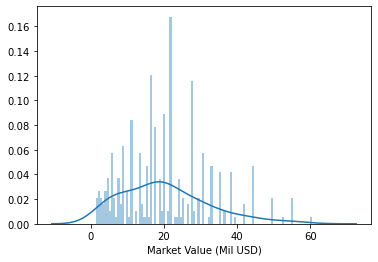

In [95]:
sns.distplot(y3_league, bins=100)

In [96]:
lr = LinearRegression()
fit = lr.fit(X3_log_league, y3_league)

df_standardized_ForMid_log['Predictions'] = fit.predict(X3_log_league)
df_standardized_ForMid_log['Residuals'] = y3_league - df_standardized_ForMid_log['Predictions']

df_standardized_ForMid_log.sort_values('Residuals', ascending=False).head(10)

,Player Name,League,Position,Age,% of Matches Started,Shots on Target %,Pass Comp Rate %,Market Value (Mil USD),logGoals/90,logAssists/90,...,logKey Passes/90,logPlayers Dribbled Past/90,logDribbles into PA/90,logCards Received/90,La Liga,Ligue 1,Premier League,Serie A,Predictions,Residuals
114,Mauro Arambarri,La Liga,MF,25.0,0.972973,0.205357,0.683172,22.0,0.037991,0.047268,...,0.354834,0.739029,0.144004,0.320300,1,0,0,0,4.278700,17.721300
102,Saïd Benrahma,Premier League,MF,25.0,0.454545,0.375000,0.747368,24.2,0.000000,0.296266,...,0.621688,1.669657,0.524524,0.000000,0,0,1,0,7.705648,16.494352
25,Carlos Soler,La Liga,MF,24.0,0.858491,0.347458,0.788915,38.5,0.115797,0.145182,...,0.754822,0.728239,0.305382,0.201482,1,0,0,0,22.607681,15.892319
57,Jordan Henderson,Premier League,MF,30.0,0.826923,0.238095,0.849118,30.8,0.079407,0.111598,...,0.595887,0.456483,0.132498,0.079407,0,0,1,0,16.412618,14.387382
68,Yussuf Poulsen,Bundesliga,FW,26.0,0.670103,0.375758,0.652129,27.5,0.347434,0.176369,...,0.719503,0.891657,0.388507,0.085279,0,0,0,0,13.765625,13.734375
4,Ousmane Dembélé,La Liga,FW,23.0,0.666667,0.437500,0.785262,55.0,0.300754,0.262942,...,1.240152,1.715851,1.133098,0.140089,1,0,0,0,41.635821,13.364179
34,Leander Dendoncker,Premier League,MF,25.0,0.873239,0.362069,0.838180,35.2,0.095462,0.000000,...,0.383523,0.470629,0.095462,0.139980,0,0,1,0,22.193122,13.006878
0,Anthony Martial,Premier League,FW,25.0,0.766990,0.453608,0.784069,60.5,0.407227,0.191975,...,0.876350,1.206351,0.985777,0.076373,0,0,1,0,47.837673,12.662327
3,Eden Hazard,La Liga,FW,30.0,0.838710,0.486188,0.817878,55.0,0.339548,0.259665,...,1.299773,1.620695,1.307094,0.052505,1,0,0,0,42.581045,12.418955
51,Lucas Torreira,La Liga,MF,24.0,0.745283,0.283951,0.863792,30.8,0.094187,0.048202,...,0.575364,0.674455,0.094187,0.240280,1,0,0,0,18.415296,12.384704


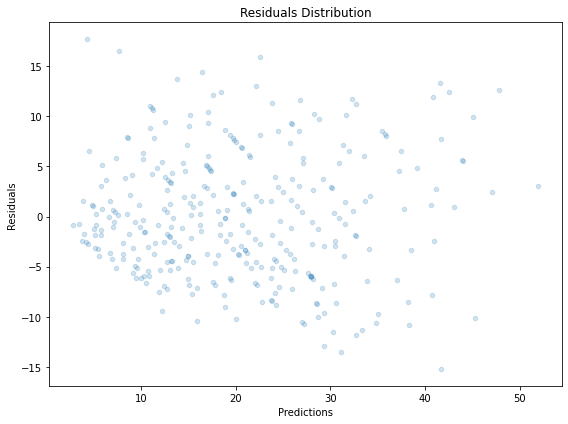

In [97]:
plot = df_standardized_ForMid_log.plot(kind='scatter',
                           x='Predictions',
                           y='Residuals',
                           alpha=0.2,
                           figsize=(8,6))
plt.title('Residuals Distribution')
plt.tight_layout()
plt.savefig('../Charts/residuals.png', dpi=600)

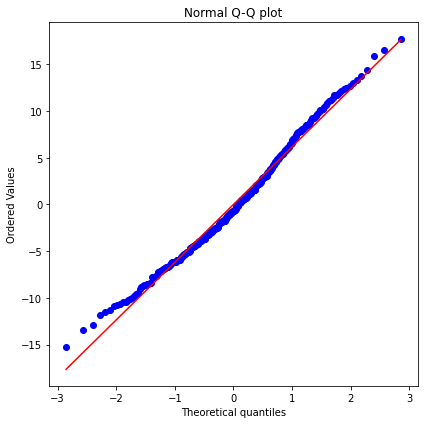

In [98]:
# diagnose/inspect residual normality using qqplot:
plt.figure(figsize=(6,6))
stats.probplot(df_standardized_ForMid_log['Residuals'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.tight_layout()
plt.savefig('../Charts/QQplot.png', dpi=600)

### 8. Final Model Testing

In [99]:
X3_log_league_train, X3_log_league_test, y3_league_train, y3_league_test = train_test_split(X3_log_league, y3_league, test_size=0.2, random_state=10)

# Fitting scaled X3_log_league, y3_league to Ridge regression
scaler_league = StandardScaler()
X3_log_league_train_scaled = scaler_league.fit_transform(X3_log_league_train)
X3_log_league_test_scaled = scaler_league.transform(X3_log_league_test)

ridge_league = RidgeCV()
ridge_league.fit(X3_log_league_train_scaled, y3_league_train)
print(f'Ridge Regression Test adjusted R^2: {1 - (1-ridge_league.score(X3_log_league_test_scaled, y3_league_test))*(len(y3_league_test)-1)/(len(y3_league_test)-X3_log_league_test_scaled.shape[1]-1)}')

Ridge Regression Test adjusted R^2: 0.630631433618457


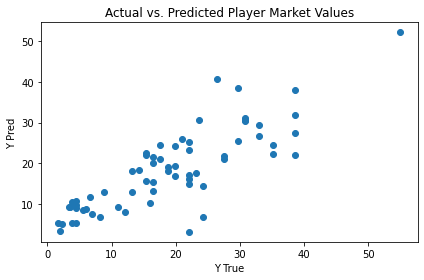

In [100]:
ridge_league_pred = ridge_league.predict(X3_log_league_test_scaled)

plt.scatter(y3_league_test, ridge_league_pred)
plt.xlabel('Y True')
plt.ylabel('Y Pred')
plt.title('Actual vs. Predicted Player Market Values')
plt.tight_layout()
plt.savefig('../Charts/actual_vs_pred.png', dpi=600)

In [101]:
mean_squared_error(y3_league_test, ridge_league_pred)

42.510942696513325

In [102]:
np.sqrt(mean_squared_error(y3_league_test, ridge_league_pred)) 

6.520041617697952

In [103]:
mean_absolute_error(y3_league_test, ridge_league_pred)

5.029376961296308

### 9. Interpreting Final Results

In [104]:
# Scaled coef of features
ridge_league.coef_

array([-6.10468971,  5.69022125,  6.76914743,  7.68258299,  2.0492526 ,
        1.27425848,  3.25418423,  2.73366678])

In [105]:
# Unscaled coef of features
ridge_league_unscaled_coef = np.true_divide(ridge_league.coef_, scaler_league.scale_)

In [106]:
ridge_league_unscaled_coef

array([-1.74401412, 35.42712032, 98.88324312, 56.49642437, 27.24672326,
        4.88153664, 10.91179043,  5.66316727])

In [107]:
# Interpreting feature coefficients in terms of dollars

ridge_league_unscaled_coef_df = pd.DataFrame(ridge_league_unscaled_coef,index = ['Age', '% of Matches Started',
                                                                  'Pass Comp Rate %', 'logGoals/90', 'logAssists/90',   
                                                                  'logGoals/SoT %', 'logDribbles into PA/90', 
                                                                  'Premier League'],
                                     columns = ['Coefficients'])

In [108]:
ridge_league_unscaled_coef_df

,Coefficients
Age,-1.744014
% of Matches Started,35.427120
Pass Comp Rate %,98.883243
logGoals/90,56.496424
logAssists/90,27.246723
logGoals/SoT %,4.881537
logDribbles into PA/90,10.911790
Premier League,5.663167


### 10. Fit a polynomial regression model and feature select using Lasso  (Future Work)

### 11. Include Defenders and Run the Same Steps Above (Future Work)